In [1]:
%load_ext autoreload
%autoreload 2

from dynamic_graphs import *

In [14]:
from typing import List

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import load_iris

In [15]:
data = load_iris(as_frame=True)
data["target"] = data["target"].map(lambda x: data["target_names"][x])

data = pd.concat([data["data"], data["target"]], axis=1)

In [108]:
def _get_dimension(values: pd.Series, label: str):
    kwargs = {}
    if values.dtype == object:
        labels = {value: n for n, value in enumerate(values.unique())}
        values.replace(labels, inplace=True)
        kwargs['tickvals'] = list(labels.values())
        kwargs['ticktext'] = list(labels.keys())
        
    return go.parcoords.Dimension(values=values, label=label, **kwargs)

def parallel(dataframe: pd.DataFrame, 
             dimensions: List[str], 
             color: str | None = None, 
             color_continuous_scale: str | None = None):
    dataframe = dataframe.copy()
    kwargs = {}
    if color and color not in dimensions:
        dimensions = [*dimensions, color]
            
    dimensions = [_get_dimension(values=dataframe[col], 
                                 label=col) for col in dimensions]
    if color:
        kwargs['line'] = {'color': dataframe[color], 'colorscale': color_continuous_scale}
    return go.Figure(go.Parcoords(dimensions=dimensions, **kwargs))

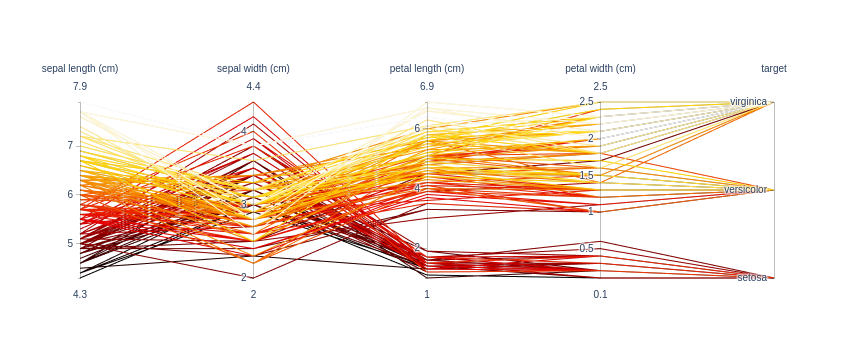

In [110]:
parallel(
    data,
    ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", 'target'],
    color='sepal length (cm)',
    color_continuous_scale='hot'
)

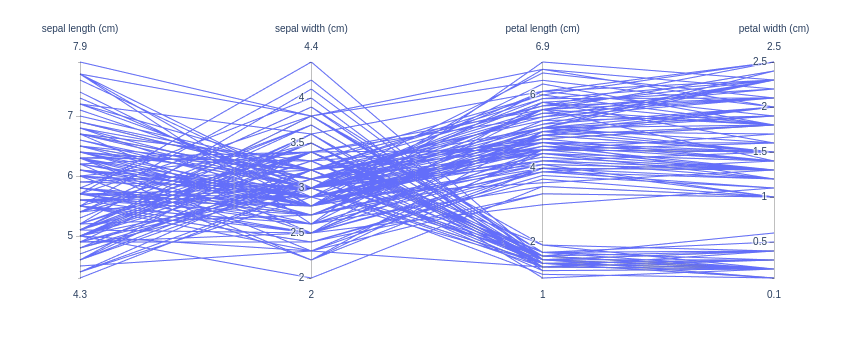

In [79]:
px.parallel_coordinates(
    data,
    ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"],
    # color="target",
)

In [ ]:
data.to_parquet("./iris.parquet")